# 1 Theory

### 1

In [79]:
import numpy as np
from scipy.stats import entropy
from math import log, e, pi
from sklearn import tree

In [80]:
Xy = np.array([[1,1,1,3],
[1,1,0,4],
[1,0,1,4],
[1,0,0,1],
[0,1,1,0],
[0,1,0,1],
[0,0,1,3],
[0,0,0,5]])
pXy = []
for xy in Xy:
    count = xy[3]
    for i in range(count):
        pXy.append(np.asarray(xy[:3]))
pXy = np.array(pXy)
y = pXy[:,0:1]
X = pXy[:,1:3]

##### a

In [81]:
def entropy(labels, base=None): # https://gist.github.com/jaradc/eeddf20932c0347928d0da5a09298147
  value, counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

In [82]:
entropy(y)

0.6829081047004717

##### b

In [83]:
def P(x,X):
    return X.count(x) / len(X)

In [85]:
def gain(y,X):
    xs0 = []
    xs1 = []
    for y1,x1 in zip(y,X):
        if y1 ==0:
            xs0.append(x1)
        if y1 ==1:
            xs1.append(x1)
    print(1-entropy(xs0))
    print(1-entropy(xs1))
#     return 1 - entropy(xs)
#     y_c
#     for x1,y1 in zip(X,y): 
        
    
# def gain(d, a):
#     total = 0
#     for v in a:
#         total += sum(v) / sum(d) * entropy(v)
#     gain = entropy(d) - total
#     return gain
print(tuple(zip(X[:,:1],y)))
(gain(y, X[:,0:1]))
(gain(y, X[:,1:2]))

((array([1]), array([1])), (array([1]), array([1])), (array([1]), array([1])), (array([1]), array([1])), (array([1]), array([1])), (array([1]), array([1])), (array([1]), array([1])), (array([0]), array([1])), (array([0]), array([1])), (array([0]), array([1])), (array([0]), array([1])), (array([0]), array([1])), (array([1]), array([0])), (array([0]), array([0])), (array([0]), array([0])), (array([0]), array([0])), (array([0]), array([0])), (array([0]), array([0])), (array([0]), array([0])), (array([0]), array([0])), (array([0]), array([0])))
0.651167904156968
0.32080673400847437
0.3634858317051872
0.32080673400847437


#### c

In [647]:
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 181.2, 'X[0] <= 0.5\ngini = 0.49\nsamples = 21\nvalue = [9, 12]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(41.85, 36.23999999999998, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(209.25, 36.23999999999998, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

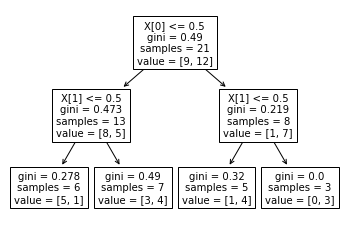

In [648]:
tree.plot_tree(clf) 

### 2

In [650]:
import numpy as np
from scipy.stats import entropy
from math import log, e, pi
import pandas as pd

In [651]:
g = np.array([
    [216,5.68,1],
    [69,4.78,1],
    [302,2.31,0],
    [60,3.16,1],
    [393,4.2,0]
])
g_df = pd.DataFrame(g)
g_df

,0,1,2
0,216.0,5.68,1.0
1,69.0,4.78,1.0
2,302.0,2.31,0.0
3,60.0,3.16,1.0
4,393.0,4.20,0.0


#### a

In [652]:
print('P(A = Yes) =', 3/5)
print('P(A = No) =', 2/5)

P(A = Yes) = 0.6
P(A = No) = 0.4


#### b

In [653]:
g_df

,0,1,2
0,216.0,5.68,1.0
1,69.0,4.78,1.0
2,302.0,2.31,0.0
3,60.0,3.16,1.0
4,393.0,4.20,0.0


In [654]:
# g_std = preprocessing.scale(g[:,0:2])
# g_std
n_chars_mean = np.mean(np.array(g_df[0]))
n_chars_stddev = np.std(np.array(g_df[0]))
awl_mean = np.mean(np.array(g_df[1]))
awl_stddev = np.std(np.array(g_df[1]))
g_df[0] = preprocessing.scale(g_df[0])
g_df[1] = preprocessing.scale(g_df[1])
g_df.loc[g_df[2] == 1]

,0,1,2
0,0.061593,1.394987,1.0
1,-1.070181,0.635925,1.0
3,-1.139473,-0.730386,1.0


In [655]:
n_chars_mean0 = np.mean(np.array(g_df.loc[g_df[2] == 0][0]))
n_chars_stddev0 = np.std(np.array(g_df.loc[g_df[2] == 0][0]))
awl_mean0 = np.mean(np.array(g_df.loc[g_df[2] == 0][1]))
awl_stddev0 = np.std(np.array(g_df.loc[g_df[2] == 0][1]))

n_chars_mean1 = np.mean(np.array(g_df.loc[g_df[2] == 1][0]))
n_chars_stddev1 = np.std(np.array(g_df.loc[g_df[2] == 1][0]))
awl_mean1 = np.mean(np.array(g_df.loc[g_df[2] == 1][1]))
awl_stddev1 = np.std(np.array(g_df.loc[g_df[2] == 1][1]))

In [656]:
print(n_chars_mean)
print(n_chars_stddev)
print(awl_mean)
print(awl_stddev)
print(n_chars_mean0)
print(n_chars_stddev0)
print(awl_mean0)
print(awl_stddev0)
print(n_chars_mean0)
print(n_chars_stddev0)
print(awl_mean0)
print(awl_stddev0)

208.0
129.88456413292536
4.026000000000001
1.1856744915869617
1.0740306281294063
0.3503110650888028
-0.650262787527847
0.7970147006664268
1.0740306281294063
0.3503110650888028
-0.650262787527847
0.7970147006664268


#### c

In [657]:
std_242 = (242 - n_chars_mean )/ n_chars_stddev
std_456 = (4.56 - awl_mean) / awl_stddev
print(std_242)
print(std_456)

0.2617709057806439
0.45037656101150375


In [661]:
sigma1 = np.array([n_chars_stddev1, n_chars_stddev1])
mu1 = np.array([n_chars_mean1, n_chars_mean1])
xk = np.array([std_242, std_456])
n = e**(-1 * (xk - mu1)**2 / (2 * (sigma1**2)))
d = sigma1 * ((2 * pi)**0.5)
(n/d) * (3/5)

array([0.14970229, 0.0768322 ])

In [ ]:
# seems unlikely.

### 2

# 2 Logistic Regression

In [8]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data
import pandas as pd
import math
from math import exp

In [9]:
#1
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df = iris_df[['sepal length (cm)', 'sepal width (cm)', 'target']]

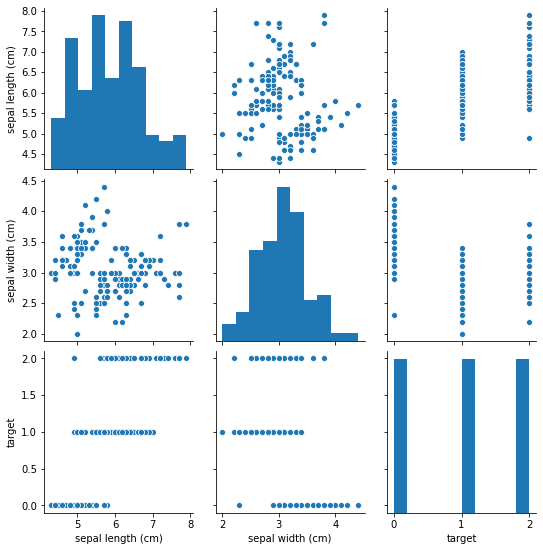

In [10]:
sb.pairplot(iris_df)

In [11]:
X = np.array(X)
y_o = np.array(y)
y = np.array(y)
y = y.reshape((X.shape[0], 1))
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [18]:
#2
# X_std = preprocessing.scale(X)
X_mean = np.mean(X, axis=0,)
X_stddev = np.std(X,axis=0,ddof=1)
X_std = X - X_mean / X_stddev

In [19]:
fixed_theta = []
for i in range(3):
    fixed_theta.append(random.uniform(-1,1))
fixed_theta = np.array(fixed_theta).reshape(3,1)
fixed_theta

array([[ 0.74715904],
       [-0.09412321],
       [ 0.12359612]])

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=42)

# X_tr = np.c_[np.ones(len(X_train)),X_train]
# X_tr = np.array(X_tr)
# X_ts = np.c_[np.ones(len(X_test)),X_test]
# X_ts = np.array(X_ts)
# y_tr = np.array(y_train)
# y_ts = np.array(y_test)

X = np.c_[np.ones(len(X)),X_std]
X = np.array(X)
y = np.array(y)
print(X)
print(y)

[[ 1.         -1.95660229 -3.51438363]
 [ 1.         -2.15660229 -4.01438363]
 [ 1.         -2.35660229 -3.81438363]
 [ 1.         -2.45660229 -3.91438363]
 [ 1.         -2.05660229 -3.41438363]
 [ 1.         -1.65660229 -3.11438363]
 [ 1.         -2.45660229 -3.61438363]
 [ 1.         -2.05660229 -3.61438363]
 [ 1.         -2.65660229 -4.11438363]
 [ 1.         -2.15660229 -3.91438363]
 [ 1.         -1.65660229 -3.31438363]
 [ 1.         -2.25660229 -3.61438363]
 [ 1.         -2.25660229 -4.01438363]
 [ 1.         -2.75660229 -4.01438363]
 [ 1.         -1.25660229 -3.01438363]
 [ 1.         -1.35660229 -2.61438363]
 [ 1.         -1.65660229 -3.11438363]
 [ 1.         -1.95660229 -3.51438363]
 [ 1.         -1.35660229 -3.21438363]
 [ 1.         -1.95660229 -3.21438363]
 [ 1.         -1.65660229 -3.61438363]
 [ 1.         -1.95660229 -3.31438363]
 [ 1.         -2.45660229 -3.41438363]
 [ 1.         -1.95660229 -3.71438363]
 [ 1.         -2.25660229 -3.61438363]
 [ 1.         -2.05660229

In [21]:
fixed_theta

array([[ 0.74715904],
       [-0.09412321],
       [ 0.12359612]])

In [22]:
m = -1 * (X @ fixed_theta)
print(m.shape)
zeroes = np.zeros(len(m))
e = zeroes + exp(1)
e = e.reshape((len(e),1))
# print(e)/
# print(e**np.ones(len(m)))
1/(1 + e**m)

(150, 1)


array([[0.62174385],
       [0.61158584],
       [0.62187799],
       [0.6211847 ],
       [0.6268504 ],
       [0.62671696],
       [0.62986986],
       [0.62105046],
       [0.61979664],
       [0.61451777],
       [0.6209162 ],
       [0.62547057],
       [0.61381937],
       [0.62491362],
       [0.62078191],
       [0.63453435],
       [0.62671696],
       [0.62174385],
       [0.61717189],
       [0.63042381],
       [0.61215031],
       [0.62753954],
       [0.63561401],
       [0.61591317],
       [0.62547057],
       [0.60934763],
       [0.62105046],
       [0.61952775],
       [0.61661015],
       [0.62187799],
       [0.616745  ],
       [0.61215031],
       [0.63684624],
       [0.63316632],
       [0.61451777],
       [0.61521571],
       [0.61284983],
       [0.62904938],
       [0.62270482],
       [0.61883279],
       [0.62395487],
       [0.59991601],
       [0.62849459],
       [0.62395487],
       [0.63042381],
       [0.61381937],
       [0.63042381],
       [0.624

In [23]:
# print(X[:,[1]])
print(X.shape)
print('fixed theta', fixed_theta)
print(fixed_theta.shape)
a = (X @ fixed_theta)   # (150,)
print(a * a)
print(a @ a)

(150, 3)
fixed theta [[ 0.74715904]
 [-0.09412321]
 [ 0.12359612]]
(3, 1)
[[0.24696582]
 [0.2061007 ]
 [0.24753313]
 [0.2446091 ]
 [0.26907925]
 [0.26848776]
 [0.28266082]
 [0.24404516]
 [0.23881316]
 [0.21747557]
 [0.24348187]
 [0.26299862]
 [0.21473536]
 [0.26056642]
 [0.24291923]
 [0.30439401]
 [0.26848776]
 [0.24696582]
 [0.22806496]
 [0.2851938 ]
 [0.20826444]
 [0.27214562]
 [0.30955623]
 [0.2230081 ]
 [0.26299862]
 [0.19764322]
 [0.24404516]
 [0.23769939]
 [0.22580043]
 [0.24753313]
 [0.22634289]
 [0.20826444]
 [0.31550904]
 [0.29792445]
 [0.21747557]
 [0.22023315]
 [0.21096318]
 [0.27893272]
 [0.25104584]
 [0.2348342 ]
 [0.25640945]
 [0.16411828]
 [0.27642776]
 [0.25640945]
 [0.2851938 ]
 [0.21473536]
 [0.2851938 ]
 [0.25698749]
 [0.25285927]
 [0.23198639]
 [0.07898552]
 [0.1139181 ]
 [0.07733758]
 [0.09671599]
 [0.07765518]
 [0.12529147]
 [0.12908894]
 [0.14426739]
 [0.07930649]
 [0.15106231]
 [0.10302476]
 [0.12949917]
 [0.06328783]
 [0.10802771]
 [0.14117851]
 [0.08816207]
 [

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 150 is different from 1)

In [24]:
def g(X,theta): # returns (n,1)  # assuming X(n,3) and theta(3,1)
    m = -1 * (X @ theta)  # (150,1)
    e = np.zeros(len(m)) + exp(1)
    e = e.reshape(m.shape)
    em = e ** m
    ones1 = np.ones(len(m)).reshape(m.shape)
    ones2 = np.ones(len(m)).reshape(m.shape)
    return ones1/(ones2 + e**m)

In [25]:
def likelihood(y,X,theta):
    gXt = g(X,theta)  # (n,1)
    o_gXt = (np.ones(len(gXt)).reshape(gXt.shape) - gXt)  # (n,1)
    o_y = (np.ones(len(y)).reshape(y.shape) - y)
    p = ((gXt**y) * (o_gXt**o_y))
#     return p
    return np.prod(p)

def log_likelihood(y,X,theta):
    gXt = g(X,theta)  # (n,1)
    o_gXt = (np.ones(len(gXt)).reshape(gXt.shape) - gXt)  # (n,1)
    o_y = (np.ones(len(y)).reshape(y.shape) - y)
    p = ((y * np.log(gXt)) + (o_y * np.log(o_gXt)))
#     return p
    return np.sum(p)

def loss(y,X,theta):
    return -1 * log_likelihood(y,X,theta)

def compute_new_theta(theta, eta, X, y):
    return theta + (eta * (X.T @ (y - g(X, theta))))

In [26]:
theta = np.array(fixed_theta.copy())
# gXt = g(X,theta)
# o_gXt = (np.ones(len(gXt)).reshape(gXt.shape) - gXt)
# o_y = (np.ones(len(y)).reshape(y.shape) - y)
# y
log_likelihood(y,X,theta)
# g(X,theta).shape
# loss(y,X,theta)
# likelihood(y,X,fixed_theta)
# log_likelihood(y,X,fixed_theta)
# g(X,fixed_theta).shape
# compute_new_theta(fixed_theta, 0.1, X,y)

-103.65903203853259

In [27]:
#3

theta = []
for i in range(3):
    theta.append(random.uniform(-1,1))
theta = np.array(theta).reshape(3,1)

# theta = fixed_theta.copy()
# theta = np.array(theta)
# theta = theta.reshape(1,3)

maxE = 2**(-23)
print('maxE',maxE)
# new_theta = theta.copy()
# theta = np.array(new_theta)
# thetas = []

# print(g(X_tr, theta))

print('Initial theta: ',theta)

iteration = 0
log_errors = []
previous_l = 1
np.seterr(divide = 'ignore') 

while True:
    new_theta = compute_new_theta(theta, 0.01, X, y)
#     print('new theta', new_theta)
#     print(new_theta.shape)
#     if abs(theta[0] - new_theta[0]) < maxE and abs(theta[1] - new_theta[1]) < maxE and abs(theta[2] - new_theta[2]) < maxE:
#         break
    if iteration == 10000:
        break
    
    likelihood_product = log_likelihood(y,X,new_theta)
    l = loss(y,X,new_theta)
#     print('likelihood_product',likelihood_product)
    if abs(previous_l - l) < maxE:
        print('loss', likelihood_product)
        break
    previous_l = l
    
#     for x,y in zip(X, yz):
# #         X1 = x[1]
# #         X2 = x[2]
#         y_a = y
#         y_p = y_compute(x, new_theta)
#         if y_p <= 0:
#             print(y_p)
#         try:
#             if y_p == 0 or 1 - y_p == 0:
#                 print(x,y_a, y_p ,theta)
#             error = (y_a * np.log(y_p)) + ((1-y_a) * np.log(1-y_p))
#             error_sum += error
#         except:
#             print('y_a',y_a)
#             print('y_p',y_p)
    
#     log_error = (-1) * error_sum / X_tr.shape[0]
#     if log_error - 0.00751309 < 0.00000001:
#         print('oye',new_theta)
#         print(log_error)
#     log_errors.append(log_error)
#     thetas.append(new_theta)
    
#     if abs(log_error) < maxE:
#         break
    
    
    theta = new_theta
    iteration = iteration + 1

print('new theta',new_theta)
# print('errors', log_errors)
# print(iteration)


# plt.axes(xlabel='iterations', ylabel='RMSEs for Test set')
# plt.plot(iterations, RMSEs_test)
# plt.show()

# plt.axes(xlabel='iterations', ylabel='RMSEs for Training set')
# plt.plot(iterations, RMSEs_train)
# plt.show()

maxE 1.1920928955078125e-07
Initial theta:  [[-0.7586035 ]
 [ 0.88723133]
 [-0.9047287 ]]


s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


new theta [[-21.55670892]
 [ 14.3672299 ]
 [-11.90497131]]


In [28]:
lgr = LogisticRegression(penalty='none',solver='lbfgs',max_iter=1000)
lgr.fit(X,y_o)
target_theta = np.array(lgr.coef_)
print(target_theta)

[[ -76.68130651  161.47110852 -112.89012196]]


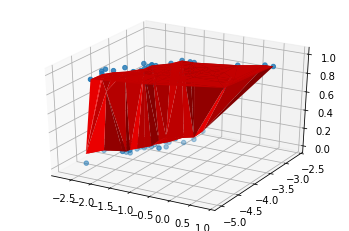

In [29]:
fig = plt.figure().gca(projection='3d')
fig.scatter(X[:,1:2], X[:,2:3], y, 'bo')
# fig.set_title('Training Data')
# fig.set_xlabel('Age')
# fig.set_ylabel('Temp of Water')
# fig.set_zlabel('Length of Fish')
y_computed = g(X,theta)
fig.plot_trisurf((X[:,1:2]).reshape(150,), X[:,2:3].reshape(150,), y_computed.reshape(150,), color='red')
plt.show()

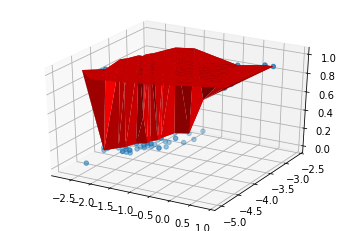

In [31]:
fig = plt.figure().gca(projection='3d')
fig.scatter(X[:,1:2], X[:,2:3], y, 'bo')
y_computed = g(X,target_theta.reshape(3,))
fig.plot_trisurf((X[:,1:2]).reshape(150,), X[:,2:3].reshape(150,), y_computed.reshape(150,), color='red')
plt.show()

# 3 Logistic Regression Spam Classification

In [450]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data
import pandas as pd
import math
from math import exp

In [467]:
#1
spam = genfromtxt('spambase.data', delimiter=',')
X = spam[:,:-1]
y = (spam[:,-1:]).reshape(len(spam),1)

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_tr = preprocessing.scale(X_train)
X_tr_mean = X_tr.mean(axis=0)
X_tr_stddev = X_tr.std(axis=0)
X_ts = X_test - X_tr_mean / X_tr_stddev

In [469]:
X_tr = np.c_[np.ones(len(X_tr)),X_tr]
X_tr = np.array(X_tr)
X_ts = np.c_[np.ones(len(X_ts)),X_ts]
X_ts = np.array(X_ts)
X_tr.shape

(3082, 58)

In [470]:
fixed_theta = []
for i in range(58):
    fixed_theta.append(random.uniform(-1,1))
fixed_theta = np.array(fixed_theta).reshape(58,1)
fixed_theta.shape

(58, 1)

In [471]:
def g(X,theta): # returns (n,1)  # assuming X(n,3) and theta(3,1)
    m = -1 * (X @ theta)  # (150,1)
    e = np.zeros(len(m)) + exp(1)
    e = e.reshape(m.shape)
    em = e ** m
    ones1 = np.ones(len(m)).reshape(m.shape)
    ones2 = np.ones(len(m)).reshape(m.shape)
    return ones1/(ones2 + e**m)

In [472]:
def likelihood(y,X,theta):
    gXt = g(X,theta)  # (n,1)
    o_gXt = (np.ones(len(gXt)).reshape(gXt.shape) - gXt)  # (n,1)
    o_y = (np.ones(len(y)).reshape(y.shape) - y)
    p = ((gXt**y) * (o_gXt**o_y))
#     return p
    return np.prod(p)

def log_likelihood(y,X,theta):
    gXt = g(X,theta)  # (n,1)
    o_gXt = (np.ones(len(gXt)).reshape(gXt.shape) - gXt)  # (n,1)
    o_y = (np.ones(len(y)).reshape(y.shape) - y)
    p = ((y * np.log(gXt)) + (o_y * np.log(o_gXt)))
#     return p
    return np.sum(p)

def loss(y,X,theta):
    return -1 * log_likelihood(y,X,theta)

def compute_new_theta(theta, eta, X, y):
    return theta + (eta * (X.T @ (y - g(X, theta))))

In [474]:
# g(X_tr, fixed_theta)

array([[0.97607827],
       [0.19930682],
       [0.91222134],
       ...,
       [0.59974211],
       [0.64977495],
       [0.31599545]])

In [476]:
maxE = 2**(-23)
print('maxE',maxE)
theta = fixed_theta.copy()
new_theta = theta.copy()

print('Initial theta: ',theta)

eta = 0.01
iteration = 0
log_errors = []
previous_l = 1
np.seterr(divide = 'ignore') 

while True:
    new_theta = compute_new_theta(theta, eta, X_tr, y_train)
    if iteration == 1500:
        break
    
    likelihood_product = log_likelihood(y_train,X_tr,new_theta)
    l = loss(y_train,X_tr,new_theta)
    if abs(previous_l - l) < maxE:
        print('loss', likelihood_product)
        break
    previous_l = l
    
    theta = new_theta
    iteration = iteration + 1

print('new theta',new_theta)

maxE 1.1920928955078125e-07
Initial theta:  [[ 5.47604425e-02]
 [ 2.52311211e-01]
 [-3.56866198e-01]
 [ 5.54150267e-01]
 [ 8.11530451e-01]
 [-1.53071251e-01]
 [-9.73110844e-01]
 [ 6.26905824e-01]
 [ 5.89135423e-01]
 [-9.71117022e-01]
 [ 5.56994735e-01]
 [-9.80304248e-01]
 [ 4.05034355e-01]
 [ 8.85443962e-03]
 [-6.16206615e-01]
 [-8.54411118e-01]
 [ 9.72644697e-02]
 [-7.64148079e-01]
 [ 9.78527323e-01]
 [-2.10889868e-02]
 [ 7.95950466e-02]
 [-2.68193057e-01]
 [-8.70025331e-01]
 [ 5.88333512e-01]
 [ 4.49086826e-01]
 [-5.87984315e-01]
 [ 7.21234827e-01]
 [-9.05696001e-01]
 [-6.51457030e-01]
 [ 4.56598986e-01]
 [ 7.02809001e-02]
 [ 7.72300481e-01]
 [ 5.92517645e-01]
 [-6.79797342e-02]
 [-9.98946210e-02]
 [ 9.54409700e-04]
 [-8.46901138e-01]
 [ 4.61327759e-01]
 [ 8.21832417e-01]
 [ 3.20188454e-01]
 [-2.35972847e-01]
 [ 9.02634306e-01]
 [ 1.59296219e-01]
 [ 1.01146516e-01]
 [-9.69929080e-01]
 [-2.32834820e-01]
 [-5.39951202e-01]
 [-6.15992476e-01]
 [ 8.03613386e-01]
 [ 5.07479894e-01]
 [-1.9

s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


new theta [[-1.22926481e+01]
 [ 2.10062334e-03]
 [-8.67416906e-02]
 [-3.85063696e-02]
 [ 6.41705314e+00]
 [ 1.11132234e+00]
 [ 2.97124545e-01]
 [ 1.94858945e+00]
 [ 4.30557516e-01]
 [ 4.34028678e-01]
 [-4.32455141e-03]
 [ 8.23688071e-02]
 [-6.19222025e-02]
 [ 2.80321689e-02]
 [ 2.52743166e-01]
 [ 6.49902351e-01]
 [ 2.02064583e+00]
 [ 6.50649363e-01]
 [-3.39493980e-01]
 [-3.05142476e-01]
 [ 7.94283496e-01]
 [ 6.34380485e-01]
 [ 6.26830518e-01]
 [ 1.54305909e+00]
 [ 2.43322108e-01]
 [-3.63869804e+00]
 [-1.70857887e+00]
 [-2.60020573e+01]
 [ 9.09252517e-01]
 [-1.35746355e+00]
 [-7.04643112e-02]
 [-3.09948562e+00]
 [ 1.80709036e+00]
 [-8.64145055e-01]
 [-7.00007060e+00]
 [-3.75276403e+00]
 [ 1.06594611e+00]
 [ 6.15506887e-01]
 [ 2.96229398e-01]
 [-4.56875789e-01]
 [ 4.39283357e-02]
 [-9.36350543e+00]
 [-2.55945052e+00]
 [-5.17530302e-01]
 [-1.38792493e+00]
 [-1.56987292e+00]
 [-3.45683030e+00]
 [-2.59806560e-01]
 [-2.17156506e+00]
 [-3.81028392e-01]
 [ 2.59887380e-01]
 [-4.91674092e-02]
 [

In [487]:
lgr = LogisticRegression(penalty='none',solver='lbfgs',max_iter=1000)
lgr.fit(X_tr,y_train)
target_theta = np.array(lgr.coef_)
print(target_theta)

s:\python\3.7.7\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.37683977e+01 -1.15823113e-01 -1.54829578e-01  5.88964677e-02
   3.31466052e+00  4.78242117e-01  1.43955024e-01  9.08362560e-01
   1.98165209e-01  1.11001146e-01  7.49723465e-04  1.18208076e-02
  -1.36552959e-01  2.08772984e-02  2.51845359e-02  2.18030948e-01
   9.18906990e-01  3.57096918e-01 -8.94321353e-02  2.22612634e-01
   4.11468123e-01  3.45461467e-01  2.07068520e-01  9.85107234e-01
   1.19911935e-01 -2.89298692e+00 -1.48271980e+00 -7.75687969e+01
   3.40151670e-01 -9.98170005e-01 -2.85790702e-01 -1.36610255e+00
   8.35403744e-01 -6.33885495e-01 -4.62946715e+00 -2.53536138e+00
   5.05018120e-01  1.00414807e-01  1.24264944e-01 -4.10387846e-01
  -1.43067931e-01 -5.76364863e+01 -2.18187305e+00 -5.79442919e-01
  -8.66400836e-01 -9.65175263e-01 -2.34124778e+00 -1.46286971e-01
  -1.66587061e+00 -3.72079637e-01  1.48997850e-02 -1.23613383e-01
   2.31757015e-01  1.52385869e+00  1.37802225e+00  1.35055228e+00
   2.47136200e+00  7.26397266e-01]]


s:\python\3.7.7\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [484]:
spam_p = 0
nospam_p = 0
tp = 0
tn = 0
fp = 0
fn = 0
for x_a, y_a in zip(X_ts, y_test):
    y_p = 1 if g(x_a, new_theta)[0] > 0.5 else 0
    if y_a[0] == 1:
        if y_p == 1:
            tp += 1
        else:  # y_p == 0
            fn += 1
    else: # y_a[0] == 0
        if y_p == 1:
            fp += 1
        else:
            tn += 1
print(tp)
print(tn)
print(fp)
print(fn)
p = tp / (tp+fp)
r = tp / (tp + fn)
f = 2 * (p*r) / (p + r)
a = (tp + tn) / (tp + tn + fp + fn)
print()
print('Precision', p)
print('Recall', r)
print('F-measure', f)
print('Accuracy', a)

612
151
753
3

Precision 0.44835164835164837
Recall 0.9951219512195122
F-measure 0.6181818181818183
Accuracy 0.5023041474654378


s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  


In [489]:
spam_p = 0
nospam_p = 0
tp = 0
tn = 0
fp = 0
fn = 0
for x_a, y_a in zip(X_ts, y_test):
    y_p = 1 if g(x_a, target_theta.reshape(58,1))[0] > 0.5 else 0
    if y_a[0] == 1:
        if y_p == 1:
            tp += 1
        else:  # y_p == 0
            fn += 1
    else: # y_a[0] == 0
        if y_p == 1:
            fp += 1
        else:
            tn += 1
print(tp)
print(tn)
print(fp)
print(fn)
p = tp / (tp+fp)
r = tp / (tp + fn)
f = 2 * (p*r) / (p + r)
a = (tp + tn) / (tp + tn + fp + fn)
print()
print('Precision', p)
print('Recall', r)
print('F-measure', f)
print('Accuracy', a)

609
258
646
6

Precision 0.4852589641434263
Recall 0.9902439024390244
F-measure 0.6513368983957218
Accuracy 0.5707702435813035


s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  


# 4 Naive Bayes Classifier

In [47]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data
import pandas as pd
import math
from math import exp
import scipy.stats as stats

In [34]:

#1
spam = genfromtxt('spambase.data', delimiter=',')
X = spam[:,:-1]
y = (spam[:,-1:]).reshape(len(spam),1)

#2 and 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#4
# X_tr = preprocessing.scale(X_train)
X_tr_mean = np.mean(X_train, axis=0,)
X_tr_stddev = np.std(X_train,axis=0,ddof=1)
X_tr = X - X_tr_mean / X_tr_stddev
X_ts = X_test - X_tr_mean / X_tr_stddev

# X_tr = np.c_[np.ones(len(X_tr)),X_tr]
X_tr = np.array(X_tr)
# X_ts = np.c_[np.ones(len(X_ts)),X_ts]
X_ts = np.array(X_ts)

In [35]:
#5
spam_X = []
spam_y = []
nonspam_X = []
nonspam_y = []
for x1, y1 in zip(X_tr, y_train):
    if y1 == 1:
        spam_X.append(x1)
        spam_y.append(y1)
    else:
        nonspam_X.append(x1)
        nonspam_y.append(y1)
spam_X = np.array(spam_X)
spam_y = np.array(spam_y)
nonspam_X = np.array(nonspam_X)
nonspam_y = np.array(nonspam_y)

In [40]:
spam_X

array([[-3.41231040e-01,  4.76502512e-01,  7.90914519e-02, ...,
         3.58430072e+00,  6.07581963e+01,  2.77546180e+02],
       [-2.81231040e-01, -1.63497488e-01,  1.49091452e-01, ...,
         9.64930072e+00,  4.84758196e+02,  2.25854618e+03],
       [-3.41231040e-01, -1.63497488e-01, -5.60908548e-01, ...,
         1.49930072e+00,  3.75819634e+00,  1.11546180e+02],
       ...,
       [-3.41231040e-01, -1.63497488e-01, -5.60908548e-01, ...,
         1.54230072e+00,  3.75819634e+00,  1.15461805e+01],
       [-3.41231040e-01, -1.63497488e-01, -5.60908548e-01, ...,
         1.82830072e+00,  1.17581963e+01,  3.35461805e+01],
       [-3.41231040e-01,  1.41165025e+01, -5.60908548e-01, ...,
         1.62830072e+00,  4.75819634e+00,  8.54618048e+00]])

In [36]:
spam_X.shape

(1198, 57)

In [54]:
def plot_normal_curves(X_means, X_stddevs):
    for mu, sigma in zip(X_means, X_stddevs):
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma))
        plt.show()

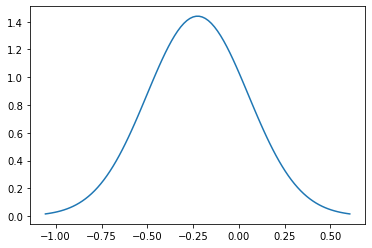

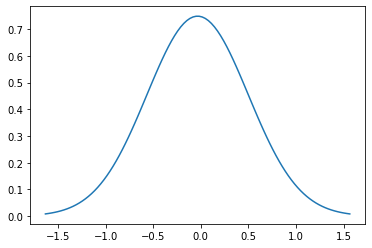

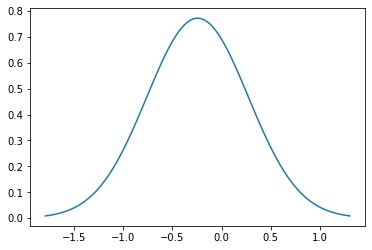

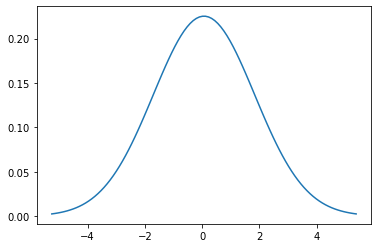

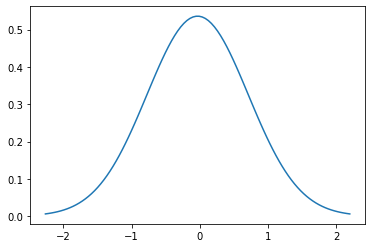

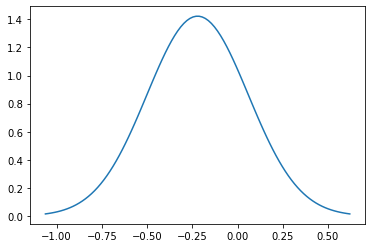

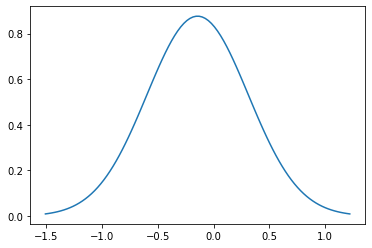

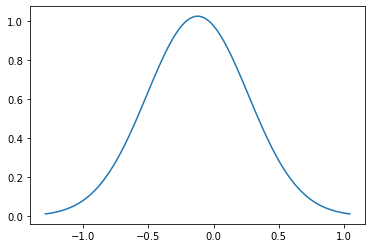

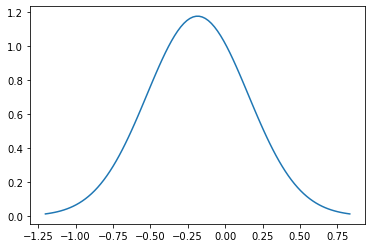

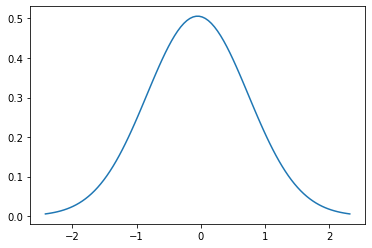

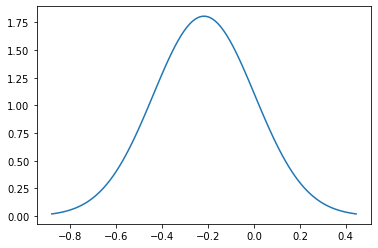

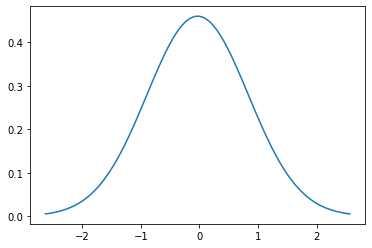

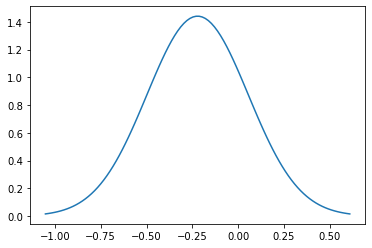

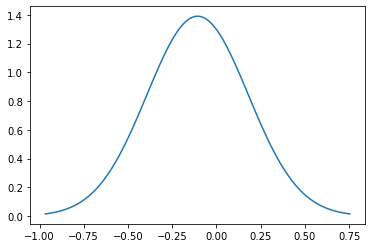

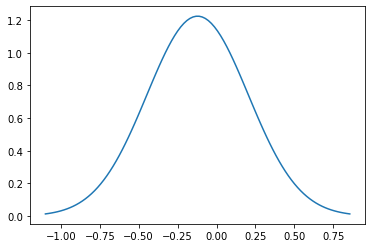

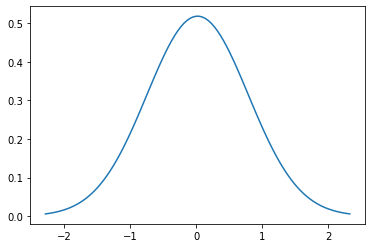

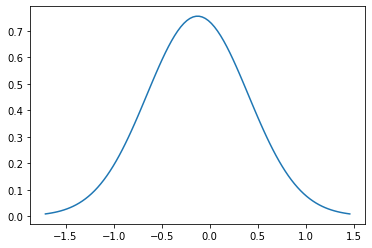

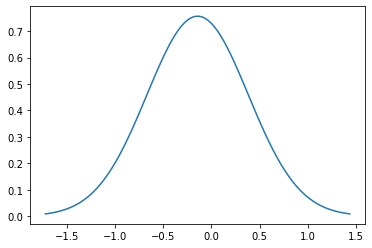

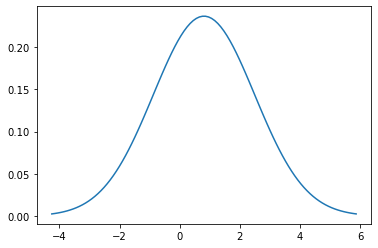

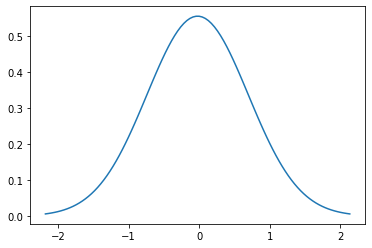

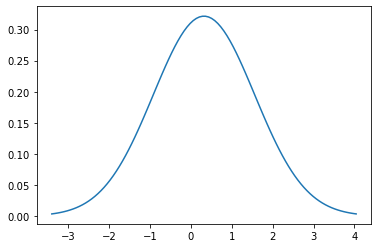

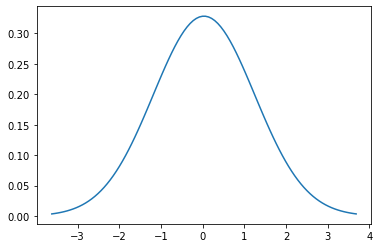

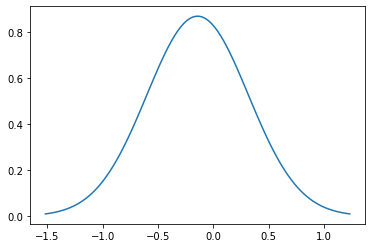

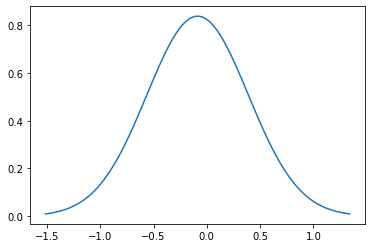

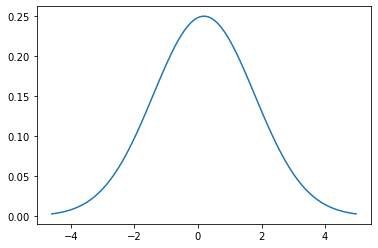

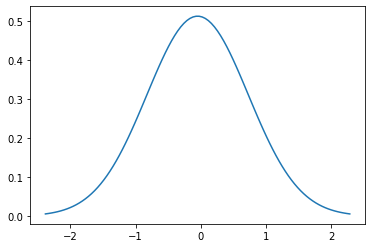

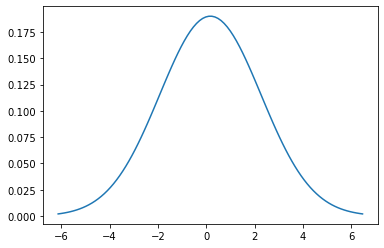

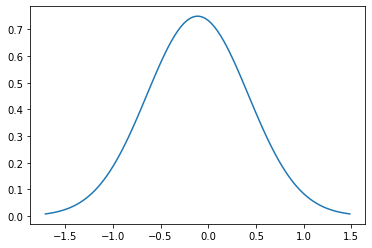

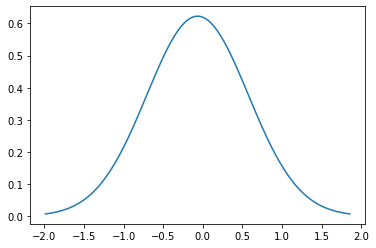

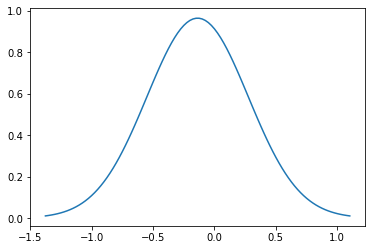

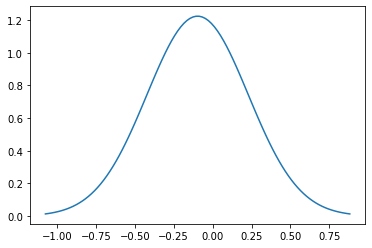

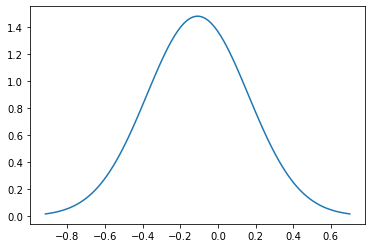

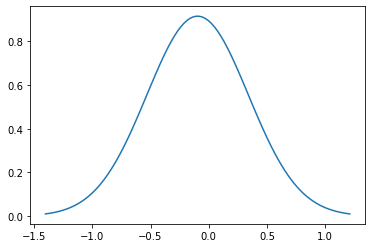

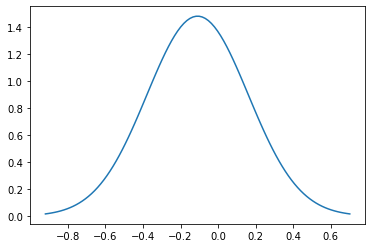

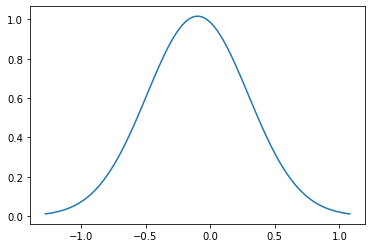

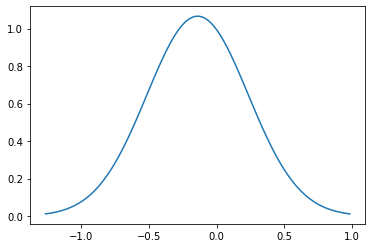

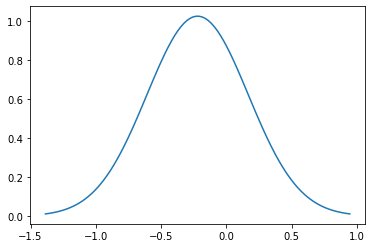

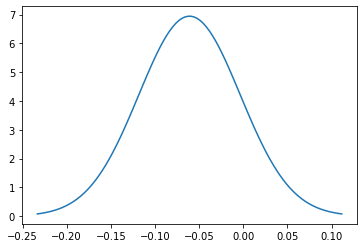

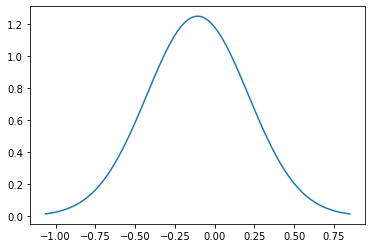

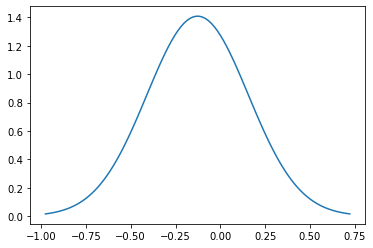

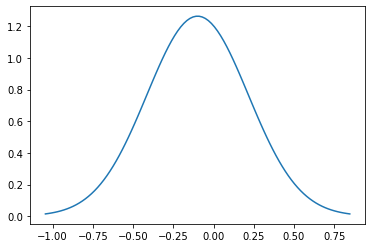

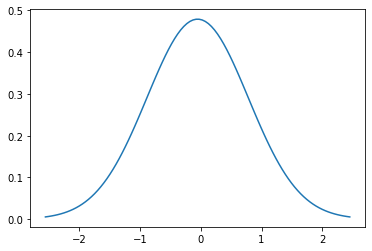

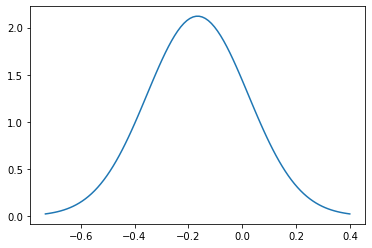

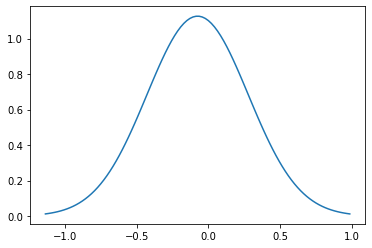

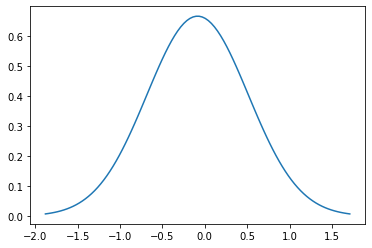

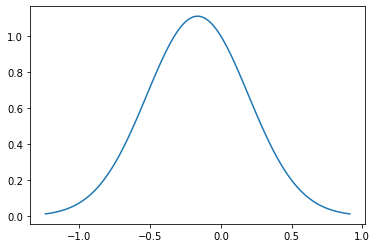

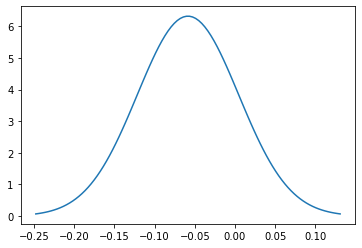

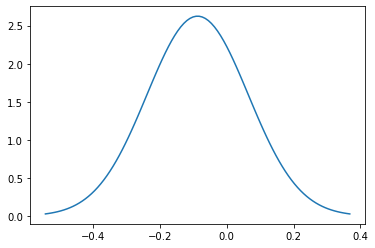

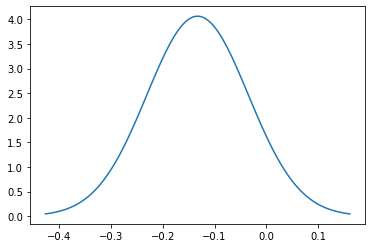

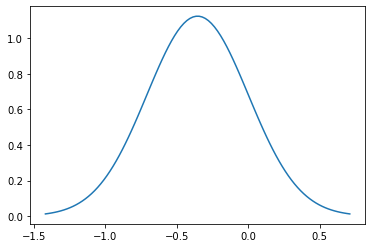

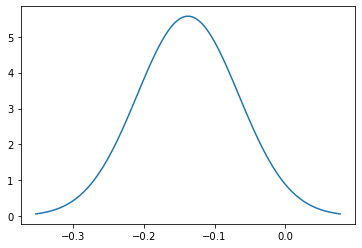

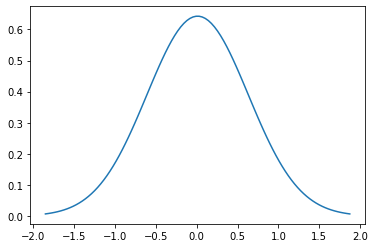

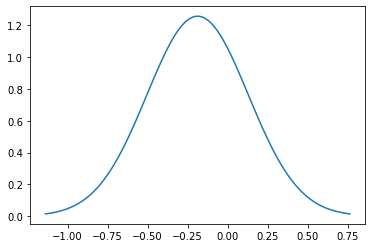

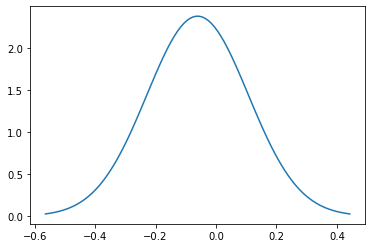

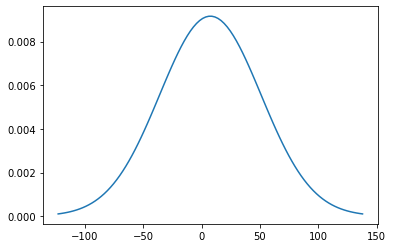

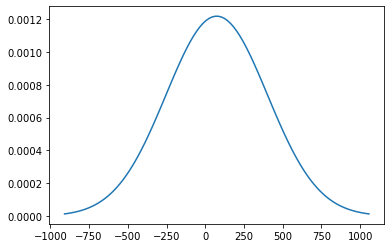

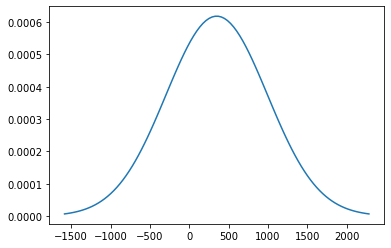

In [55]:
spam_X_means = np.mean(spam_X, axis=0)
spam_X_stddevs = np.std(spam_X, axis=0, ddof=1)
plot_normal_curves(spam_X_means, spam_X_stddevs)

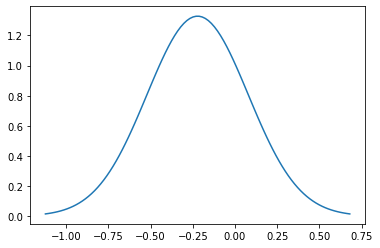

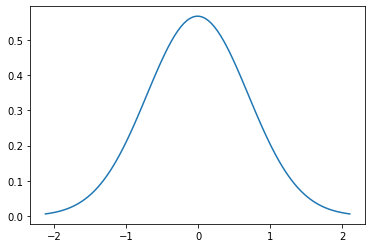

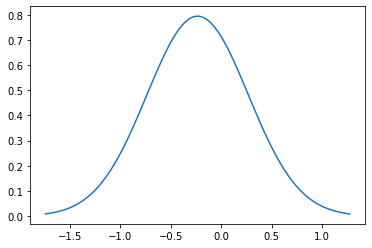

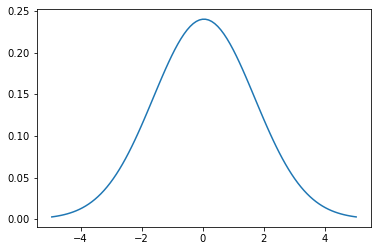

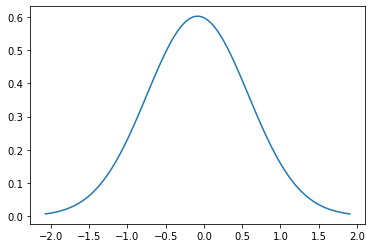

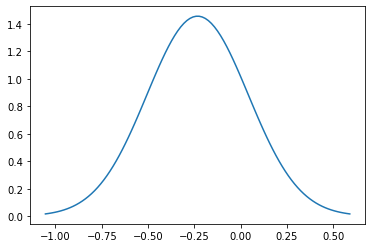

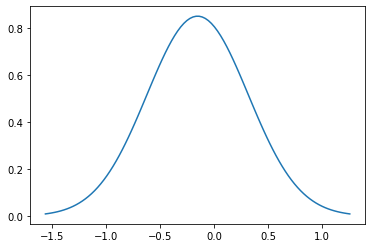

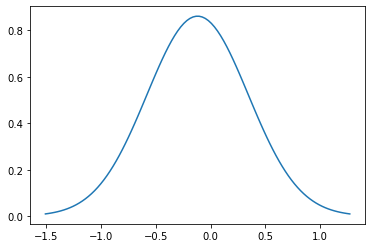

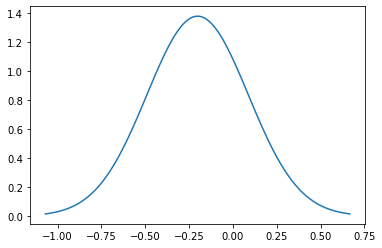

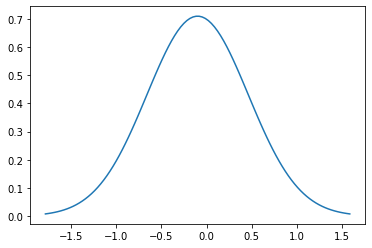

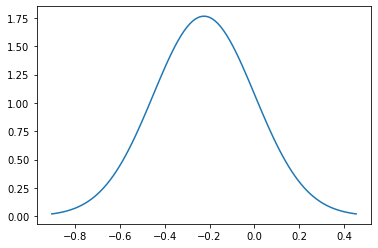

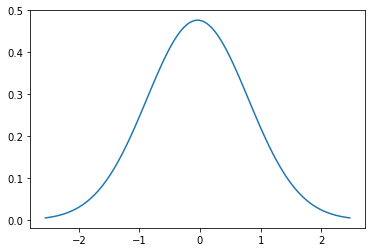

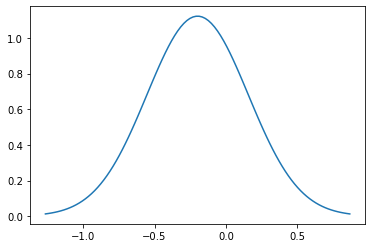

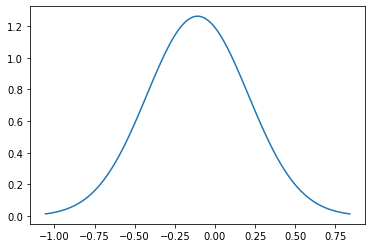

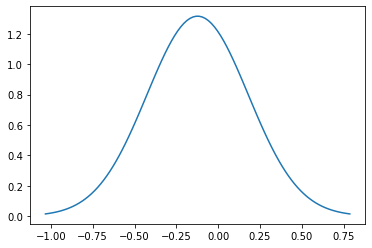

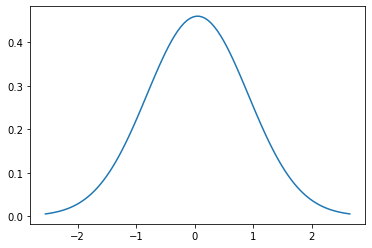

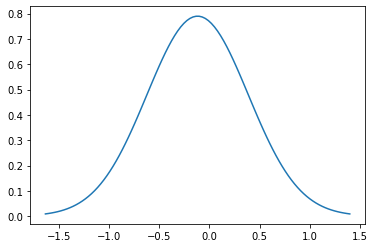

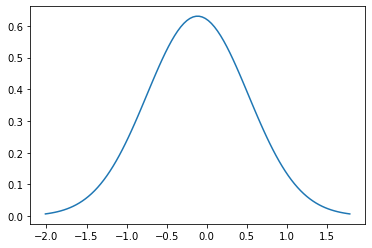

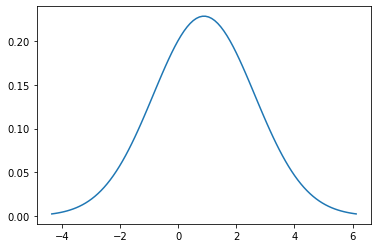

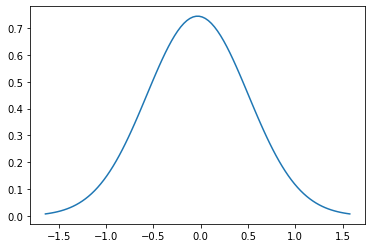

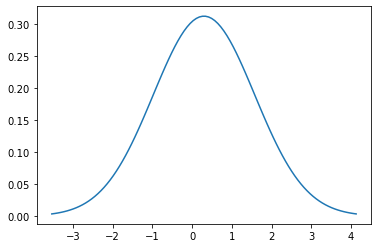

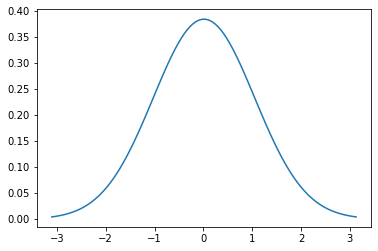

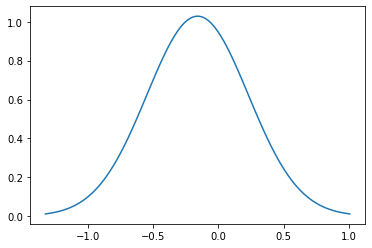

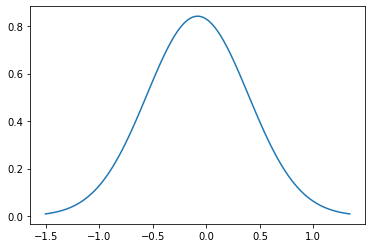

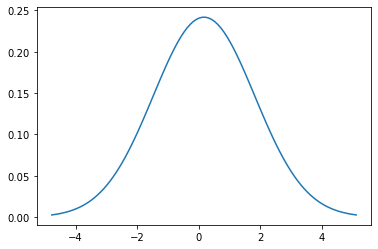

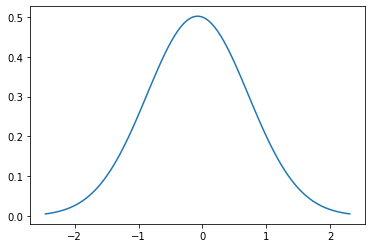

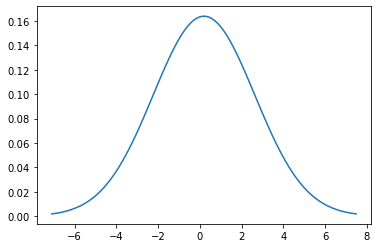

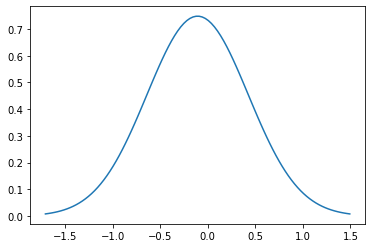

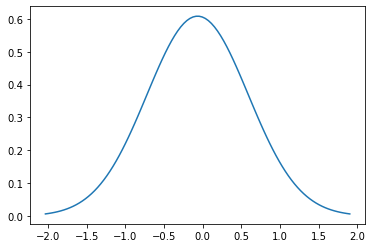

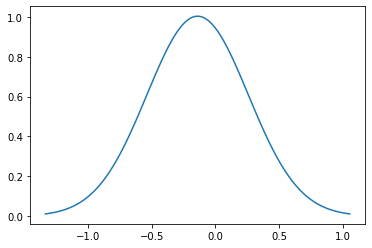

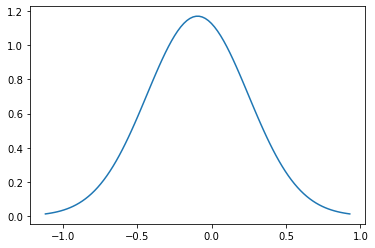

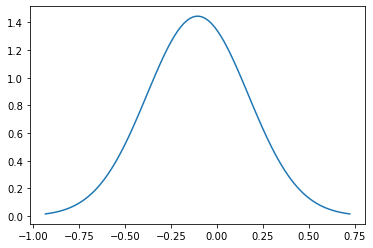

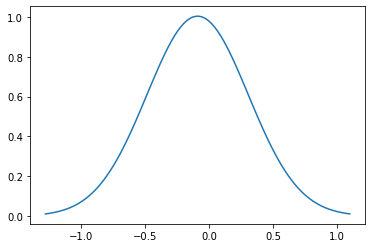

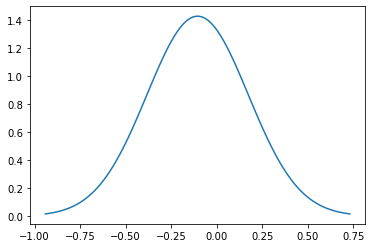

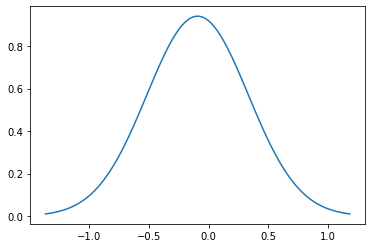

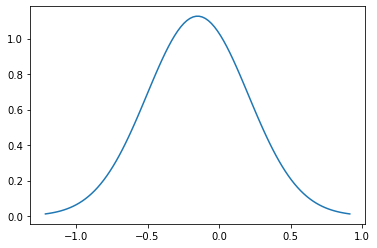

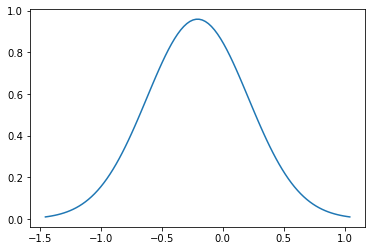

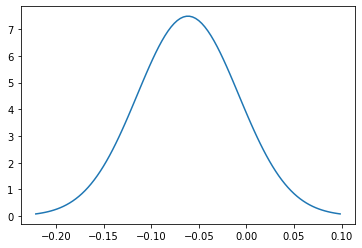

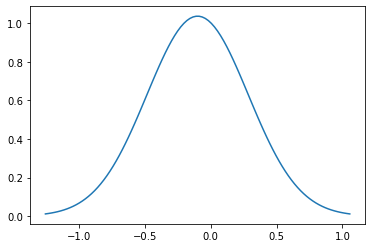

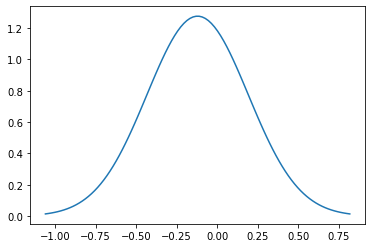

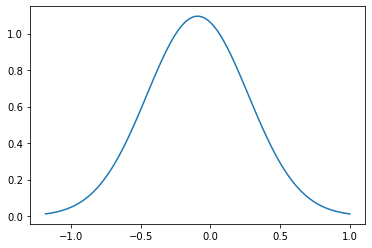

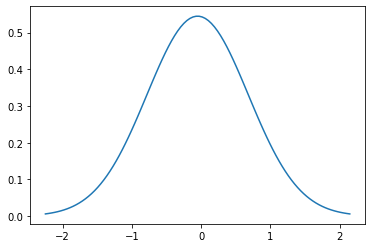

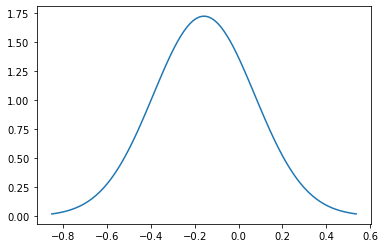

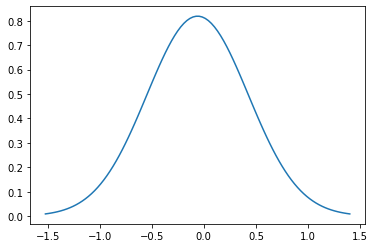

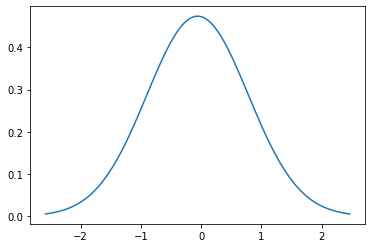

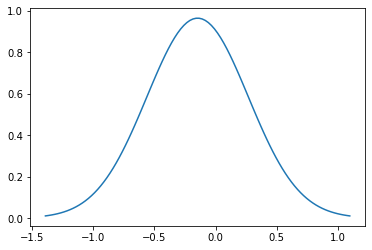

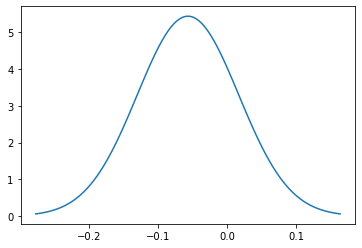

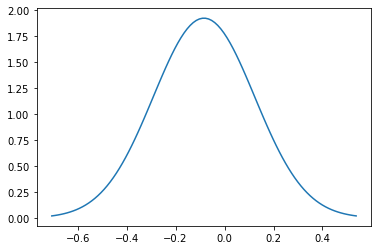

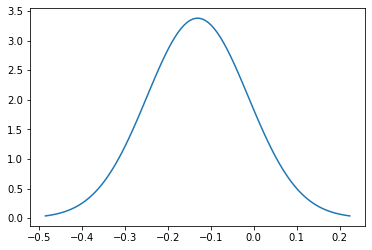

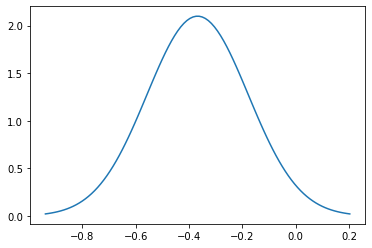

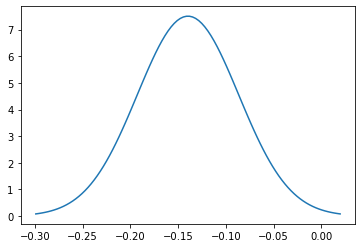

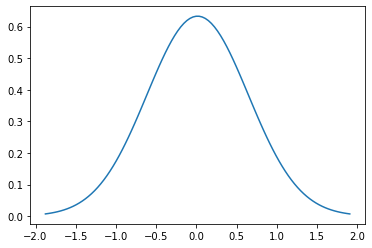

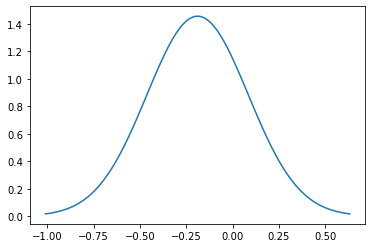

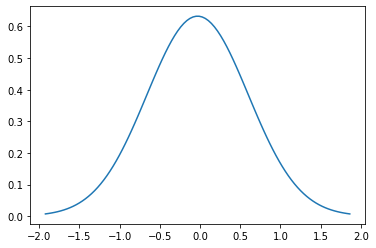

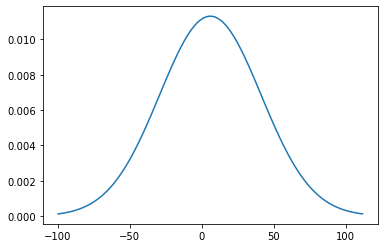

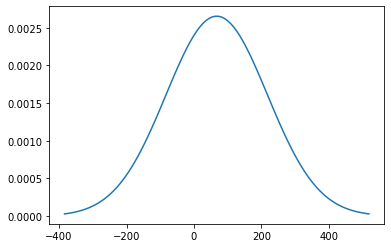

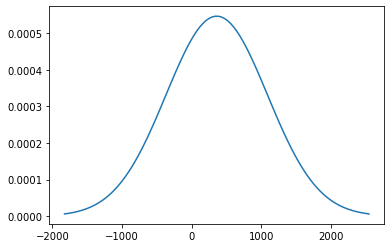

In [57]:
nonspam_X_means = np.mean(nonspam_X, axis=0)
nonspam_X_stddevs = np.std(nonspam_X, axis=0, ddof=1)
plot_normal_curves(nonspam_X_means, nonspam_X_stddevs)

In [61]:
def compute_abs_zval(val, mean, stddev):
    return abs(val - mean) / stddev

In [63]:
spam_count = 0
nonspam_count = 0

for x in X_ts:
    _0c = 0
    _1c = 0
    for feat, nsm, nss, sm, ss in zip(x, nonspam_X_means, nonspam_X_stddevs, spam_X_means, spam_X_stddevs):
        z0 = compute_abs_zval(feat, nsm, nss)
        z1 = compute_abs_zval(feat, sm, ss)
        if z0 > z1:
            _1c += 1
        else:
            _0c += 1
    if _0c > _1c:
#         print(x, 'not spam')
        nonspam_count += 1
    else:
#         print(x, 'spam')
        spam_count += 1
print('Number of spams:', spam_count)
print('Number of non-spams:', nonspam_count)

Number of spams: 23
Number of non-spams: 1496


In [ ]:
spam_count = 0
nonspam_count = 0

for x in X_ts:
    _0c = 0
    _1c = 0
    for feat, nsm, nss, sm, ss in zip(x, nonspam_X_means, nonspam_X_stddevs, spam_X_means, spam_X_stddevs):
        z0 = compute_abs_zval(feat, nsm, nss)
        z1 = compute_abs_zval(feat, sm, ss)
        if z0 > z1:
            _1c += 1
        else:
            _0c += 1
    if _0c > _1c:
#         print(x, 'not spam')
        nonspam_count += 1
    else:
#         print(x, 'spam')
        spam_count += 1
print('Number of spams:', spam_count)
print('Number of non-spams:', nonspam_count)

In [66]:
class NaiveBayes:  # https://github.com/python-engineer/MLfromscratch/blob/master/LICENSE

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            spam_X = []
            for x1, y1 in zip(X_tr, y_train):
                if y1 == 1:
                    spam_X.append(x1)
            spam_X = np.array(spam_X)
            X_c = spam_X#X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]
            

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [73]:
nb = NaiveBayes()
nb.fit(X_tr, y_train)
predictions = nb.predict(X_ts)
# X_train.shape
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

{0.0: 1519}